In [17]:
import tensorflow as tf
d= tf.__version__
print(d)

2.9.1


In [2]:
!pip install bert-extractive-summarizer

In [1]:
from summarizer import Summarizer
model=Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [2]:
text=[]
with open('texting.txt', 'r', errors='ignore') as f:
    contents = f.read()
    text.append(contents)
text=" ".join(text)
text

'We cleaned up Stacys challenges in a matter of weeks! First, I gave \nher a technique to get back to sleep within three minutes so she could \nwake up rested. Next, we prioritized the 61 projects on her plate. As she \nlearned to question herself less and get more done, she felt she had accomplished enough at the end of each day to go home. She learned the \ntools to push herself when needed and to relax and be present with her \nfamily when desired. As a result, her life became more balanced. After \nshe learned communication techniques to minimize her assistants mistakes, Stacys relief was visible. As these skills gave her more of a sense \nof control, we were able to deal with that self-critical voice and go over \nhow to stop overreacting with her kids. At home, her guilt began to melt \naway and, at work, she grew into her potential as a leader. Four months \nlater, Stacy was promoted.\nDan was ready to break through to the next level of success. We \nsculpted his business around

In [5]:
summary=model("If you\nwere to read something for one hour a day that improved\nyour ability to do your work, that would put you in the top\none percent in our society within five years.\nListen to educational audio programs when you are traveling in your car. Today")
print(summary)   #model(text) why we are type here sentences is we want to 

C:\Users\vsn01\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


If you
were to read something for one hour a day that improved
your ability to do your work, that would put you in the top
one percent in our society within five years. Listen to educational audio programs when you are traveling in your car.


In [4]:
#word cloud
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wwordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

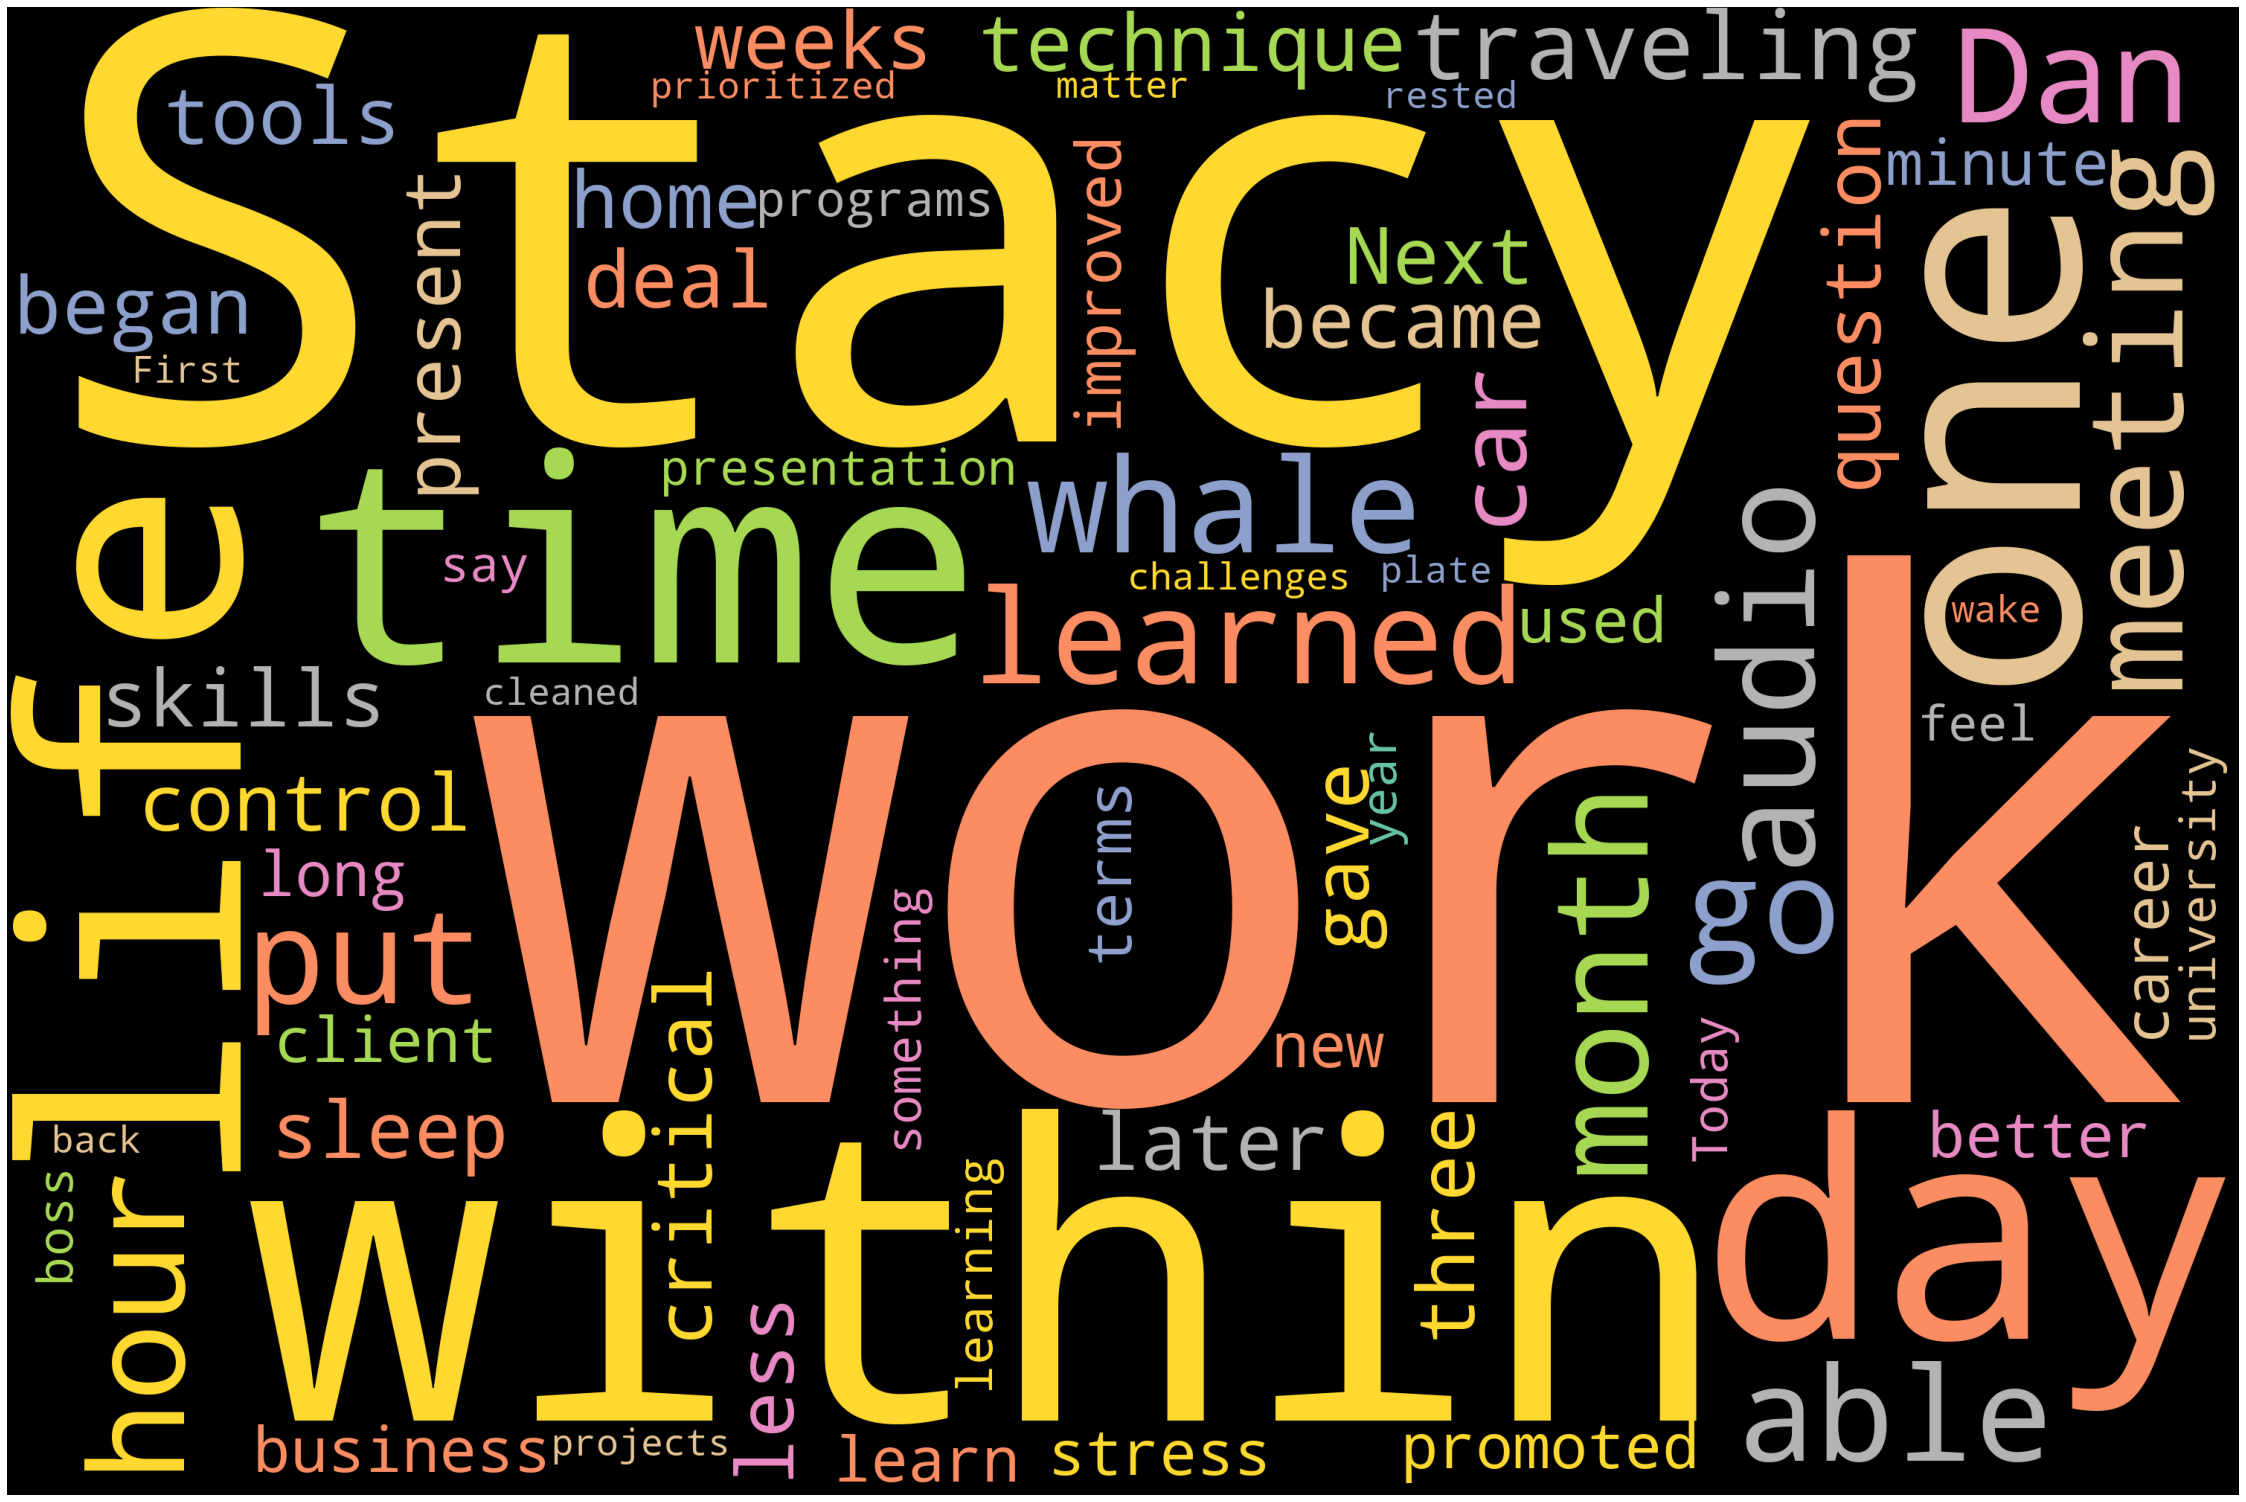

In [5]:
#plot text

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=70,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

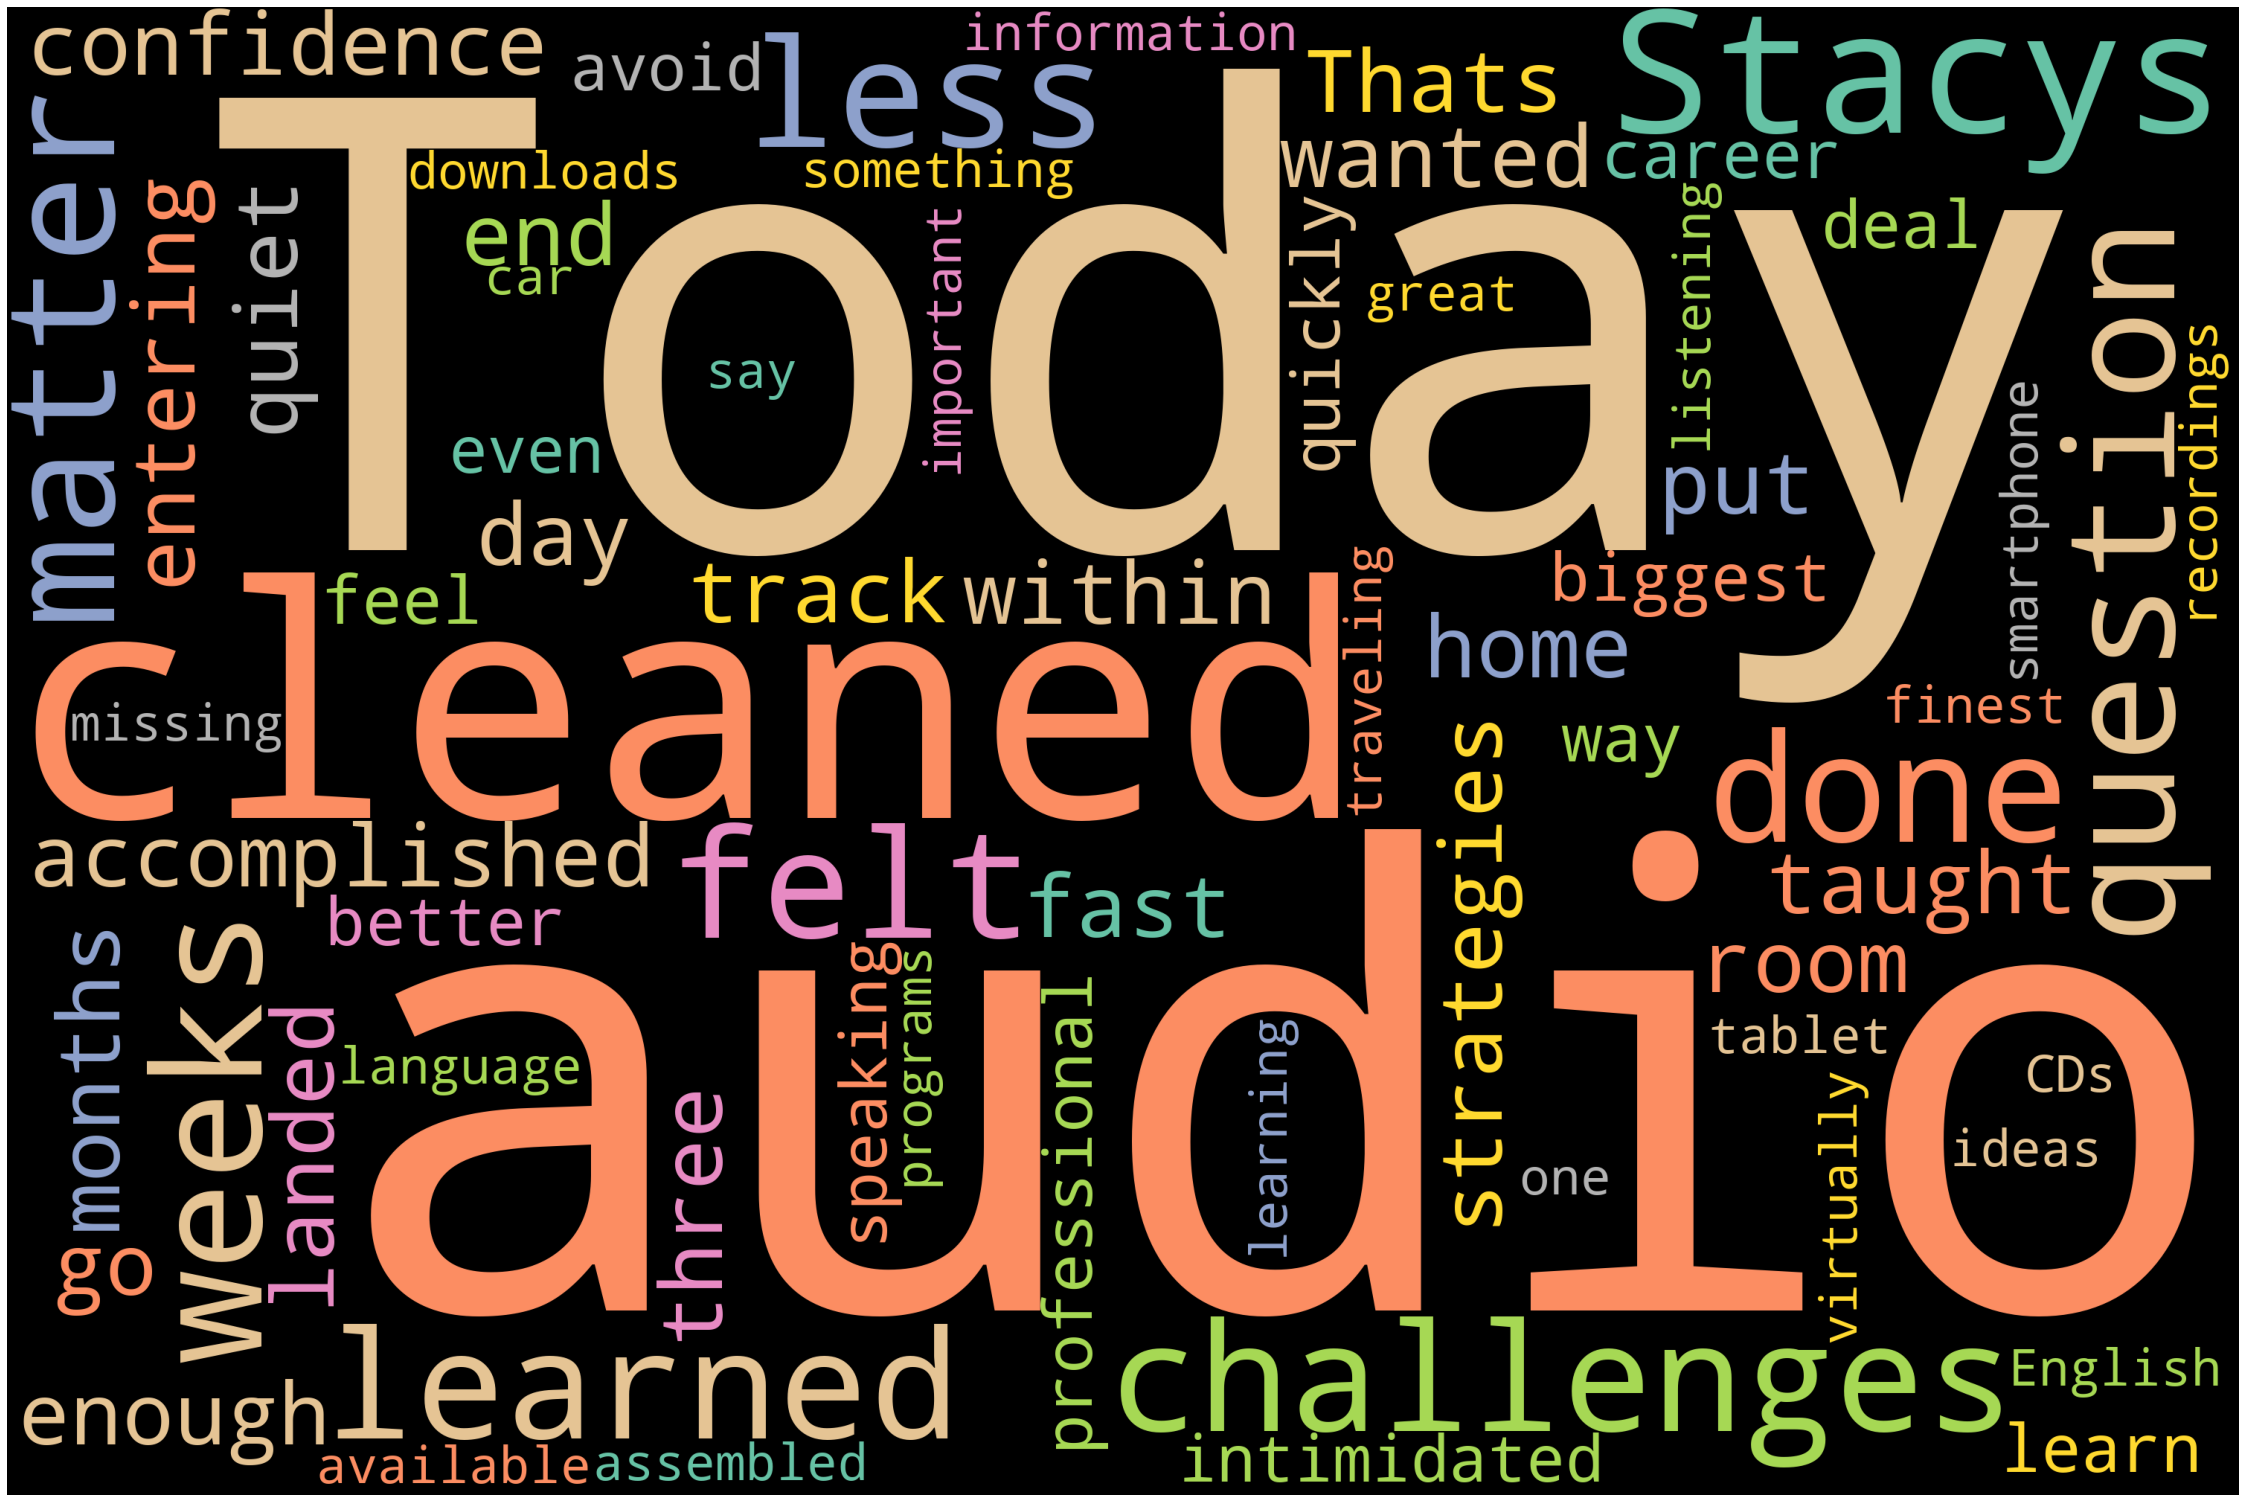

In [6]:
#plot summary

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=70,colormap='Set2',stopwords=stopwords).generate(summary)
# Plot
plot_cloud(wordcloud)

In [7]:
Model_Accuracy=len(summary)/len(text)*100
Model_Accuracy

21.72523961661342

In [8]:
#deployment
from pickle import dump
from pickle import load

In [12]:
# save the model
dump(Summarizer,open('Summarizer.sav', 'wb'))

In [13]:
#load the model of disk
loaded_model = load(open('Summarizer.sav', 'rb'))